#### Load the Boston Housing dataset using scikit-learn's built-in function. 

The Boston Housing dataset contains information about various houses in Boston and their prices.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()

In [31]:
# boston is a dictionary, let's check what it contains

print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

In [32]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

bos['MEDV'] = boston.target

In [33]:
print("Dataframe type : {}".format(type(bos)))
print("Dataframe shape: {}".format(bos.shape))
print("Dataframe features: {}".format(list(bos.columns.values)))

Dataframe type : <class 'pandas.core.frame.DataFrame'>
Dataframe shape: (506, 14)
Dataframe features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [34]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
# check for missing values in all the columns

print("[INFO] df isnull():\n {}".format(bos.isnull().sum()))

[INFO] df isnull():
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Visualisation

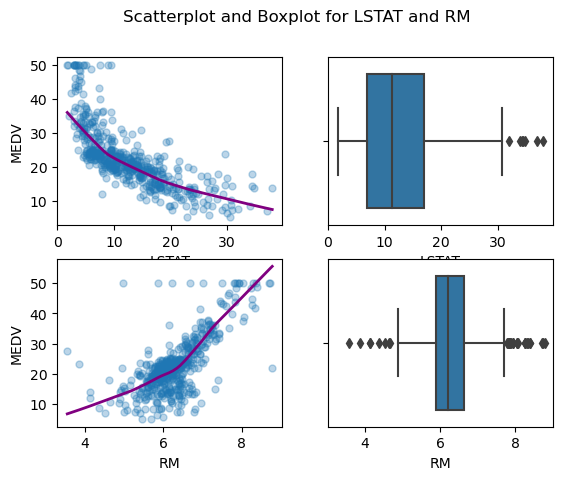

In [37]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Scatterplot and Boxplot for LSTAT and RM")

sns.regplot(x=bos['LSTAT'], y=bos['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[0, 0])

sns.boxplot(x=bos['LSTAT'], ax=axes[0, 1])

sns.regplot(x=bos['RM'], y=bos['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[1, 0])

sns.boxplot(x=bos['RM'], ax=axes[1, 1]).set(xlim=(3, 9))

plt.show()

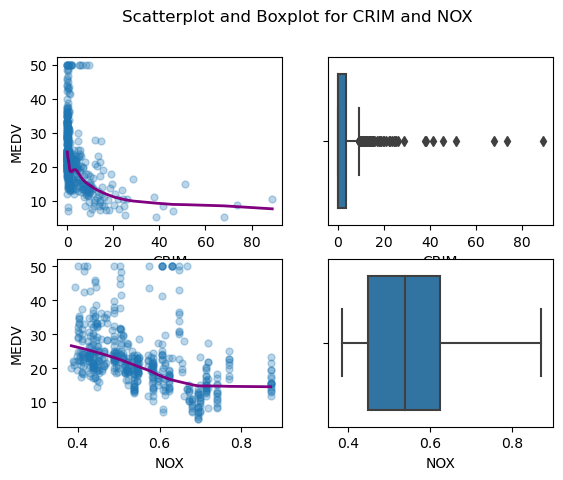

In [38]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Scatterplot and Boxplot for CRIM and NOX")

sns.regplot(x=bos['CRIM'], y=bos['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[0, 0])

sns.boxplot(x=bos['CRIM'], ax=axes[0, 1])

sns.regplot(x=bos['NOX'], y=bos['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[1, 0]).set(xlim=(0.35, 0.9))
            
sns.boxplot(x=bos['NOX'], ax=axes[1, 1]).set(xlim=(0.35, 0.9))

plt.show()

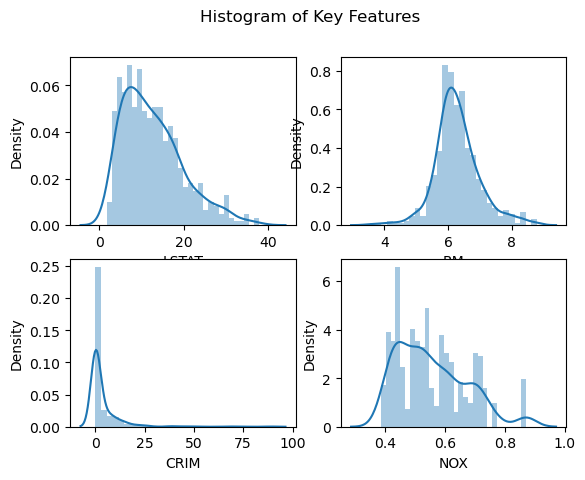

In [39]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Histogram of Key Features")

sns.distplot(bos['LSTAT'], bins=30, ax=axes[0, 0])
sns.distplot(bos['RM'], bins=30, ax=axes[0, 1])
sns.distplot(bos['CRIM'], bins=30, ax=axes[1, 0])
sns.distplot(bos['NOX'], bins=30, ax=axes[1, 1])

plt.show()

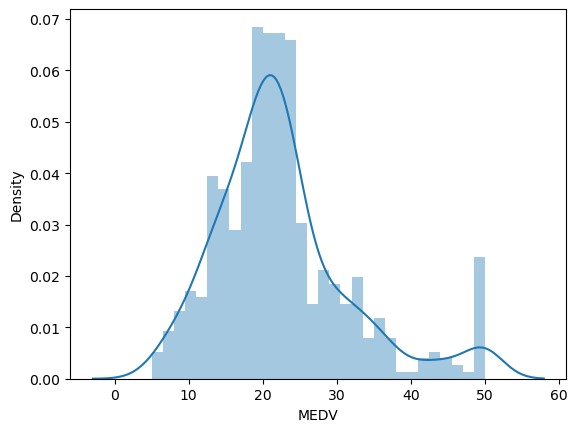

In [40]:
# plot a histogram showing the distribution of the target variable

sns.distplot(bos['MEDV'], bins=30)

plt.show()

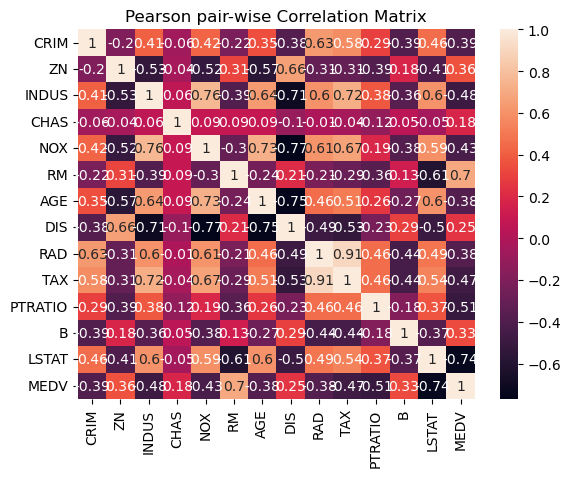

In [41]:
# compute the pair wise correlation for all columns  
correlation_matrix = bos.corr(method='pearson').round(2)
 
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

plt.title('Pearson pair-wise Correlation Matrix')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures


In [43]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM'], bos['CRIM'], bos['NOX']], columns=['LSTAT', 'RM', 'CRIM', 'NOX'])
Y = bos['MEDV']

print(X.shape)
print(Y.shape)

(506, 4)
(506,)


In [44]:
# Preprocess the dataset

X = bos.drop(columns=['MEDV'])
y = bos['MEDV']
X_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1))

   

In [45]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [46]:
# Define the pipeline for polynomial regression

pipeline = make_pipeline(PolynomialFeatures(), Ridge())

In [47]:
# Define the hyperparameters for random search
param_distributions = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': np.logspace(-4, 4, 100)
}


In [48]:
# Perform random search to find the best hyperparameters

random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('ridge', Ridge())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'polynomialfeatures__degree': [1, 2, 3],
                                        'ridge__alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04,...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04

In [49]:
# Get the best hyperparameters and train the model

best_degree = random_search.best_params_['polynomialfeatures__degree']
best_alpha = random_search.best_params_['ridge__alpha']
model = make_pipeline(PolynomialFeatures(degree=best_degree), Ridge(alpha=best_alpha))
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=17.886495290574352))])

In [50]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

In [51]:
# Calculate the mean squared error and R2 score for the predictions

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [52]:
print(f"Best degree: {best_degree}")
print(f"Best alpha: {best_alpha}")
print(f"MSE: {mse}")
print(f"R2 score: {r2}")

Best degree: 2
Best alpha: 17.886495290574352
MSE: 0.1570410739351357
R2 score: 0.8192192303660589


##### R2 score is a measure of how well the model fits the data, with higher values indicating a better fit. The R2 score can range from 0 to 1, with values closer to 1 indicating a better fit.